In [203]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

my_data = pd.read_csv('polynomial_train.csv') #read the data

In [204]:
#1)Bringing dataset in desired form and defining ultravariables
a = my_data.iloc[:,1]
A=a.to_numpy()

p = my_data.iloc[:,2]
B=p.to_numpy()

c = my_data.iloc[:,3]
C=c.to_numpy()

y = my_data.iloc[:,4]
Y=y.to_numpy()

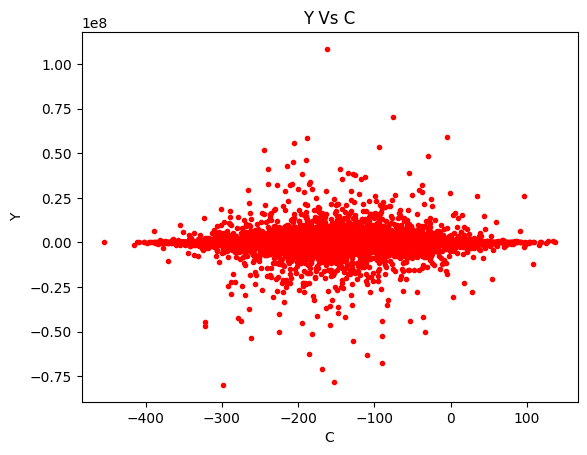

In [205]:
plt.scatter(C,Y, marker='.', c='r')
# plt.scatter(A,A*A*A, marker='.', c='b')
plt.ylabel('Y')
plt.xlabel('C')
plt.title('Y Vs C')

plt.show()

In [206]:
my_data['label']= A*A
my_data['B2']= B*B
my_data['C2']= C*C
my_data['AB']= A*B
my_data['BC']= B*C
my_data['CA']= C*A
my_data['A3']= A**3
my_data['B3']= B**3
my_data['C3']= C**3
my_data['A2B']= A*A*B
my_data['B2C']= B*B*C
my_data['C2A']= C*C*A
my_data['ABC']=A*B*C
my_data['A4']=A**4
my_data['B4']=B**4
my_data['C4']=C**4
my_data['A4']=A**4
my_data['A3B']=A**3*B
my_data['AB3']=A*B**3
my_data['B3C']=B**3*C
my_data['BC3']=B*C**3
my_data['C3A']=C**3*A
my_data['CA3']=C*A**3
my_data['A2B2']=A**2*B**2
my_data['B2C2']=B**2*C**2
my_data['C2A2']=A**2*C**2
my_data['A2BC']=A**2*B*C
my_data['B2CA']=B**2*C*A
my_data['C2AB']=C**2*A*B
my_data['A5']=A**5
my_data['B5']=B**5
my_data['C5']=C**5
my_data['Y']=Y
print(my_data)

       Unnamed: 0            A            B           C         label  \
0               0 -1113.924581   952.105404 -276.045881  1.240828e+06   
1               1 -2229.480228  1111.488568  -93.454107  4.970582e+06   
2               2  2717.257713    53.431237 -179.228591  7.383489e+06   
3               3 -1638.783965  -632.919447 -106.170237  2.685613e+06   
4               4  5173.934338  -721.895577  -75.074840  2.676960e+07   
...           ...          ...          ...         ...           ...   
49995       49995  -401.109554   205.180269 -123.837422  1.608889e+05   
49996       49996   832.536891  -723.312711 -128.736597  6.931177e+05   
49997       49997  -533.446993  1171.457335 -130.840925  2.845657e+05   
49998       49998  1810.499103  -424.111696 -128.334986  3.277907e+06   
49999       49999  -861.910217   257.295992 -176.122871  7.428892e+05   

                 B2            C2            AB             BC             CA  \
0      9.065047e+05  76201.328341 -1.06057

In [212]:
#1)Bringing dataset in desired form and defining ultravariables
x = my_data.iloc[:,1:35]
X_train=x.to_numpy()
Y = my_data.iloc[:,35]
y_train=Y.to_numpy()
w_init=np.zeros(34)
b_init=0.0
print(X_train, y_train)

[[-1.11392458e+03  9.52105404e+02 -2.76045881e+02 ... -1.71505850e+15
   7.82393352e+14 -1.60289973e+12]
 [-2.22948023e+03  1.11148857e+03 -9.34541072e+01 ... -5.50830685e+16
   1.69638725e+15 -7.12839841e+09]
 [ 2.71725771e+03  5.34312371e+01 -1.79228591e+02 ...  1.48133796e+17
   4.35487954e+08 -1.84942384e+11]
 ...
 [-5.33446993e+02  1.17145734e+03 -1.30840925e+02 ... -4.31972757e+13
   2.20613650e+15 -3.83458196e+10]
 [ 1.81049910e+03 -4.24111696e+02 -1.28334986e+02 ...  1.94532232e+16
  -1.37214892e+13 -3.48117079e+10]
 [-8.61910217e+02  2.57295992e+02 -1.76122871e+02 ... -4.75674799e+14
   1.12762607e+12 -1.69464520e+11]] [ -1294.28891782 -27146.87008356  64743.00171817 ...   -285.70796526
   8161.59530383   -255.16713134]


In [213]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

In [214]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
X_n=np.array(X_norm)

#Y_n, X_mu, X_sigma = zscore_normalize_features(y_train)
Y_n=y_train
print(X_n)

[[-4.13847686e-01  9.81327881e-01 -1.77549966e+00 ... -4.87792739e-03
  -3.21111756e-02 -2.03924002e+00]
 [-8.05078008e-01  1.20523369e+00  7.89920950e-01 ... -1.45788719e-02
   7.21688013e-02  4.59479065e-01]
 [ 9.29764969e-01 -2.81154049e-01 -4.15213455e-01 ...  2.23607765e-02
  -1.21376449e-01  1.81051203e-01]
 ...
 [-2.10271616e-01  1.28947944e+00  2.64634895e-01 ... -4.57402562e-03
   1.30327438e-01  4.10597647e-01]
 [ 6.11760696e-01 -9.52019359e-01  2.99843425e-01 ... -1.03007308e-03
  -1.22942019e-01  4.16131493e-01]
 [-3.25465128e-01  5.24070821e-03 -3.71577991e-01 ... -4.65263901e-03
  -1.21247844e-01  2.05287028e-01]]


In [215]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                         
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [216]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_n, Y_n, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 3337943820214.536


In [217]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b ) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [218]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_n, Y_n, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -4760.874138088149
dj_dw at initial w,b: 
 [-1320793.0825778    -17665.95502085   -20397.91344208    44659.60134781
    -3986.7048938     23369.71080436  -473167.4180642      4045.17766711
  1194142.24037651 -2317143.68366398   -10487.60173891   -24602.19450799
   -75980.98385054    -4400.151238   -1036129.41828349   413262.08150057
   127961.2200051     -3147.53239463    24319.69163127  -843359.12960885
  -342731.97091321     4411.94078734    -6112.54847422   867084.65975333
  2102667.12361292    -9994.13354881     5543.34226181   137779.59641574
     4813.52732162   683731.84494002  -350864.47941927 -2582590.03707508
    -3215.01380745   -22947.05550008]


In [219]:
 def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [224]:

# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 600
alpha = 0.25
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_n, Y_n, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)


Iteration    0: Cost 1468934892773.31   
Iteration   60: Cost 12968734642.11   
Iteration  120: Cost 3582965988.15   
Iteration  180: Cost 1679066001.79   
Iteration  240: Cost 1076456205.20   
Iteration  300: Cost 850046631.14   
Iteration  360: Cost 755576198.77   
Iteration  420: Cost 712136304.30   
Iteration  480: Cost 690337411.16   
Iteration  540: Cost 678624973.92   


In [225]:
y_final=[]
iter=[]
m=len(X_n)
for i in range(m):
  pred=np.dot(X_n[i], w_final)+b_final
  y_final.append(pred)
  iter.append(i)
#print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
#m,_ = X_train.shape
#for i in range(m):
 #   print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

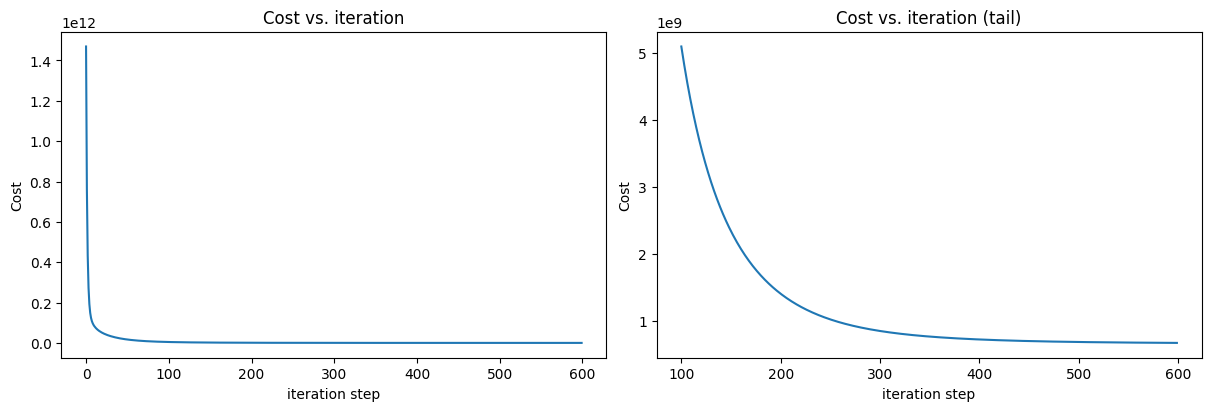

In [226]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [227]:
print(len(X_n), len(Y_n))

50000 50000


In [228]:
print(y_final)

[-161.92014368261425, -20047.65054923114, 54479.063240679134, 748.9568535086391, 1596266.8728397463, 1388.3145509688243, -15713.336621449169, 332207.767099302, 23696.29301935107, 19618.70842508302, 177843.10015937014, -4284.2148646948, 653517.7801735025, -885.3453153646979, -2035972.0397556531, -339814.3681456589, -4550.295123681174, 2446.853904821066, -14351.447396086573, -6711.153826017125, 735101.7540752378, 99812.66102244871, 6709.914396279628, 274193.2331525565, 527321.5976640532, -17507.076866839285, -26626.72125188362, 30591.43916640612, -4796568.042105382, 37374.62820258317, -529831.8426771576, -136644.9188744694, 4910.78060067109, 442420.81598284806, 496690.0017212516, -16857.205098363047, -7415.0489383747035, -654880.7667841287, -27664.489775513364, 88351.0149578217, -15393.76354946618, 7655610.211876454, 76791.42015623291, -4726.8087137863795, 118190.06430725196, 11364.432960612725, -287155.7994037524, -74469.45204468776, 1875.2097370616252, -14180.110169599098, -11076.53289

ValueError: ignored

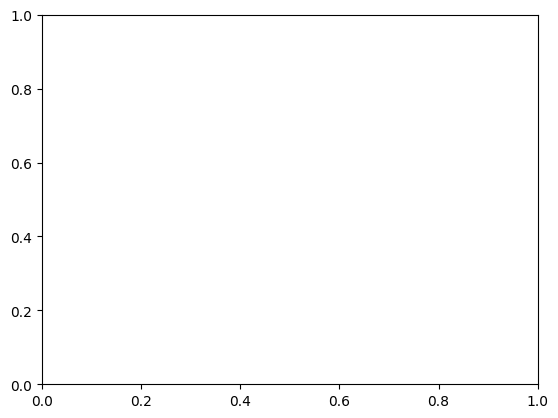

In [242]:
#Plotting predicted value of y and original value of y for every example
plt.scatter(X_n.transpose()[0],Y_n, marker='x', c='r')
plt.scatter(X_n.transpose()[0],y_final, marker='.', c='b')
plt.ylabel('Y')
plt.xlabel('A')
plt.title("A Vs Y")
plt.show()

In [234]:
corr_matrix = np.corrcoef(y_train, y_final)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.999798647219597


#Final prediction

In [235]:
my_data = pd.read_csv('polynomial_test_data.csv') #read the data

In [236]:
my_data

,ids,A,B,C
0,78886,-961.622191,789.966580,-43.660479
1,35987,3460.005131,786.092527,-144.096657
2,63576,1648.281427,241.985600,-267.040826
3,86537,-5361.100419,1062.669779,-199.007043
4,45235,-2303.208688,-248.185768,-317.468950
...,...,...,...,...
19995,42763,-1941.831479,284.320247,-88.712478
19996,52748,-993.524028,535.348652,-97.151458
19997,42159,665.127361,683.355125,-184.768610
19998,22095,-80.508468,-24.409192,-153.713418


In [239]:
#1)Bringing dataset in desired form and defining ultravariables
a = my_data.iloc[:,1]
A=a.to_numpy()

p = my_data.iloc[:,2]
B=p.to_numpy()

c = my_data.iloc[:,3]
C=c.to_numpy()

my_data['A2']= A*A
my_data['B2']= B*B
my_data['C2']= C*C
my_data['AB']= A*B
my_data['BC']= B*C
my_data['CA']= C*A
my_data['A3']= A**3
my_data['B3']= B**3
my_data['C3']= C**3
my_data['A2B']= A*A*B
my_data['B2C']= B*B*C
my_data['C2A']= C*C*A
my_data['ABC']=A*B*C
my_data['A4']=A**4
my_data['B4']=B**4
my_data['C4']=C**4
my_data['A4']=A**4
my_data['A3B']=A**3*B
my_data['AB3']=A*B**3
my_data['B3C']=B**3*C
my_data['BC3']=B*C**3
my_data['C3A']=C**3*A
my_data['CA3']=C*A**3
my_data['A2B2']=A**2*B**2
my_data['B2C2']=B**2*C**2
my_data['C2A2']=A**2*C**2
my_data['A2BC']=A**2*B*C
my_data['B2CA']=B**2*C*A
my_data['C2AB']=C**2*A*B
my_data['A5']=A**5
my_data['B5']=B**5
my_data['C5']=C**5
print(my_data)

#1)Bringing dataset in desired form and defining ultravariables
x = my_data.iloc[:,1:35]
X_train=x.to_numpy()


X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
X_n=np.array(X_norm)


y_final=[]
iter=[]
m=len(X_n)
for i in range(m):
  pred=np.dot(X_n[i], w_final)+b_final
  y_final.append(pred)
  iter.append(i)

         ids            A            B           C            A2  \
0      78886  -961.622191   789.966580  -43.660479  9.247172e+05   
1      35987  3460.005131   786.092527 -144.096657  1.197164e+07   
2      63576  1648.281427   241.985600 -267.040826  2.716832e+06   
3      86537 -5361.100419  1062.669779 -199.007043  2.874140e+07   
4      45235 -2303.208688  -248.185768 -317.468950  5.304770e+06   
...      ...          ...          ...         ...           ...   
19995  42763 -1941.831479   284.320247  -88.712478  3.770709e+06   
19996  52748  -993.524028   535.348652  -97.151458  9.870900e+05   
19997  42159   665.127361   683.355125 -184.768610  4.423944e+05   
19998  22095   -80.508468   -24.409192 -153.713418  6.481613e+03   
19999  80712 -2997.298907   778.622097  -59.340165  8.983801e+06   

                 B2             C2            AB             BC            CA  \
0      6.240472e+05    1906.237411 -7.596494e+05  -34490.319146  4.198489e+04   
1      6.179415e+05  

In [240]:
print(y_final)

[-18915.778172487953, 214288.58003127066, -1021.8894004390886, -1725804.3241156319, -45156.22431539496, -23493.28576710119, -206858.87861930722, 8366.82308842297, -25381.64276669571, 34955.13273780252, 3647.7546100482577, 139880.8819913151, 2283.458740593039, 1132116.4548457353, -28110.8390983606, 5619452.679183589, -17873.48644578012, -13522.283264436814, 491785.9094919204, -47112.71157051292, 17464.82248984302, -10535271.370705366, -19287.95635945838, 16691.902065242477, -43820.62688666896, -13581.784095065072, -78543.01073046502, -5663.096036441105, -1037624.0628389267, 918529.2896559667, 259525.1684729245, 7190.121939797699, 69542.61449700569, -598427.1821551077, -287434.0299209699, -383590.93681724765, 781137.6654187854, 7178.193866319071, -136970.09834195848, -2179450.4581645797, 5292.750976680051, 569719.2771731063, -11940.361927247253, -644802.1335770851, -1047872.9128540974, -54255.20550603816, -1240922.7062295305, 4026.126283258339, 4268.342035146817, 1443.293298154923, -8357

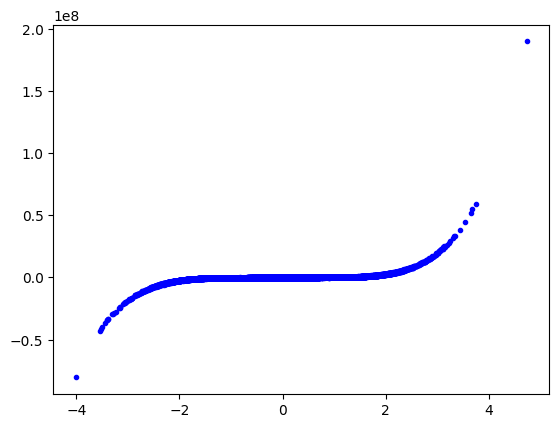

In [243]:
plt.scatter(X_n.transpose()[0],y_final, marker='.', c='b')
plt.show()

In [245]:

from numpy import asarray
from numpy import savetxt
savetxt('polynomial out deg 5.csv', y_final, delimiter=',', header='Labels')